In [1]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv("Titanic_dataset_kaggle.csv",usecols=["Cabin","Ticket","Pclass","Survived"])

In [6]:
df.head()

,Survived,Pclass,Ticket,Cabin
0,0,3,330911,NaN
1,1,3,363272,NaN
2,0,2,240276,NaN
3,0,3,315154,NaN
4,1,3,3101298,NaN


In [7]:
df['Pclass'].unique()

array([3, 2, 1], dtype=int64)

Text(0.5, 1.0, 'passengers travelling with')

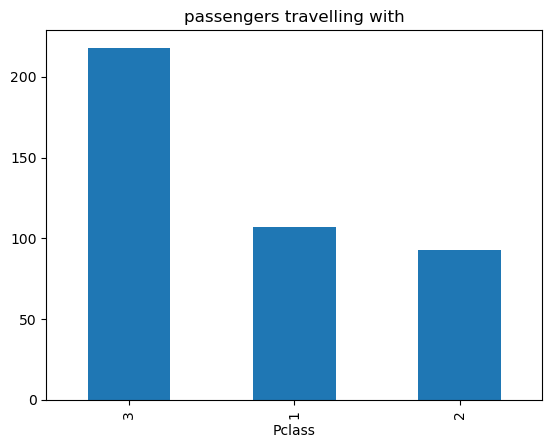

In [8]:
fig=df["Pclass"].value_counts().plot.bar()
fig.set_title('passengers travelling with')

In [15]:
# extract numerical part
df['number_numerical']=pd.to_numeric(df['Pclass'],errors='coerce',downcast='integer')

In [18]:
# extract categorical part
df['number_categorical']=np.where(df['number_numerical'].isnull(),df['Pclass'],np.nan)
df.head()

,Survived,Pclass,Ticket,Cabin,number_numreical,number_numerical,number_categorical
0,0,3,330911,NaN,3,3,NaN
1,1,3,363272,NaN,3,3,NaN
2,0,2,240276,NaN,2,2,NaN
3,0,3,315154,NaN,3,3,NaN
4,1,3,3101298,NaN,3,3,NaN


In [19]:
df['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [20]:
df['Ticket'].unique()

array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4 48871', '349220', '694', '21228',
       '24065', 'W.E.P. 5734', 'SC/PARIS 2167', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'C 17368', 'PC 17598',
       'PC 17597', 'PC 17608', 'A/5. 3337', '113509', '2698', '113054',
       '2662', 'SC/AH 3085', 'C.A. 31029', 'C.A. 2315', 'W./C. 6607',
       '13236', '2682', '342712', '315087', '345768', '1601', '349256',
       '113778', 'SOTON/O.Q. 3101263', '237249', '11753',
       'STON/O 2. 3101291', 'PC 17594', '370374', '11813', 'C.A. 37671',
       '13695', 'SC/PARIS 2168', '29105', '19950', 'SC/A.3 2861',
       '382652', '349230', '348122', '386525', '349232', '237216',
       '347090', '334914', 'F.C.C. 13534', '330963', '113796', '2543',
       '382653', '349211', '3101297', 'PC 17562', '113503', '359306',
       '11770', '248744', '368702', '2678', 'PC 17483', '19924', '349238',
       '240261', '2660', '3308

In [21]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter

df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shish\AppData\Local\Temp\ipykernel_19240\2675238062.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part


,Survived,Pclass,Ticket,Cabin,number_numreical,number_numerical,number_categorical,cabin_num,cabin_cat
0,0,3,330911,NaN,3,3,NaN,NaN,NaN
1,1,3,363272,NaN,3,3,NaN,NaN,NaN
2,0,2,240276,NaN,2,2,NaN,NaN,NaN
3,0,3,315154,NaN,3,3,NaN,NaN,NaN
4,1,3,3101298,NaN,3,3,NaN,NaN,NaN


<Axes: xlabel='cabin_cat'>

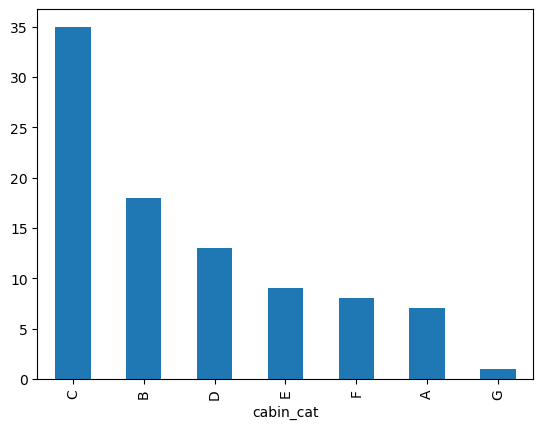

In [22]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [23]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

df.head(20)

,Survived,Pclass,Ticket,Cabin,number_numreical,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,0,3,330911,NaN,3,3,NaN,NaN,NaN,330911,NaN
1,1,3,363272,NaN,3,3,NaN,NaN,NaN,363272,NaN
2,0,2,240276,NaN,2,2,NaN,NaN,NaN,240276,NaN
3,0,3,315154,NaN,3,3,NaN,NaN,NaN,315154,NaN
4,1,3,3101298,NaN,3,3,NaN,NaN,NaN,3101298,NaN
5,0,3,7538,NaN,3,3,NaN,NaN,NaN,7538,NaN
6,1,3,330972,NaN,3,3,NaN,NaN,NaN,330972,NaN
7,0,2,248738,NaN,2,2,NaN,NaN,NaN,248738,NaN
8,1,3,2657,NaN,3,3,NaN,NaN,NaN,2657,NaN
9,0,3,A/4 48871,NaN,3,3,NaN,NaN,NaN,48871,A/4


In [24]:
df['ticket_cat'].unique()

array([nan, 'A/4', 'W.E.P.', 'SC/PARIS', 'STON/O2.', 'PC', 'C', 'A/5.',
       'SC/AH', 'C.A.', 'W./C.', 'SOTON/O.Q.', 'STON/O', 'SC/A.3',
       'F.C.C.', 'F.C.', 'A./5.', 'PP', 'STON/OQ.', 'SOTON/OQ', 'CA',
       'SC/A4', 'S.O./P.P.', 'CA.', 'S.O.C.', 'SOTON/O2', 'AQ/4', 'A.',
       'SC', 'A/5', 'SC/Paris', 'LP', 'AQ/3.', 'S.C./PARIS', 'A.5.'],
      dtype=object)